In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show_image_plt(image):
    plt.figure(figsize=(8, 8))
    if image.ndim == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image[...,::-1])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
img = 128 * np.ones(shape=(512, 512, 3), dtype=np.uint8)

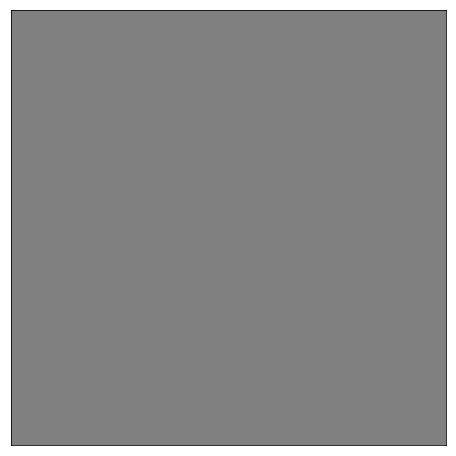

In [4]:
show_image_plt(img)

In [5]:
# Changes img inplace and returns new image
type(cv2.rectangle(img, (0,1), (10,10), color=(0, 255, 255), thickness=2, lineType=cv2.LINE_AA))

numpy.ndarray

In [6]:
img = cv2.rectangle(img, (236,236), (276, 276), color=(0, 255, 255), thickness=-1, lineType=cv2.LINE_AA)

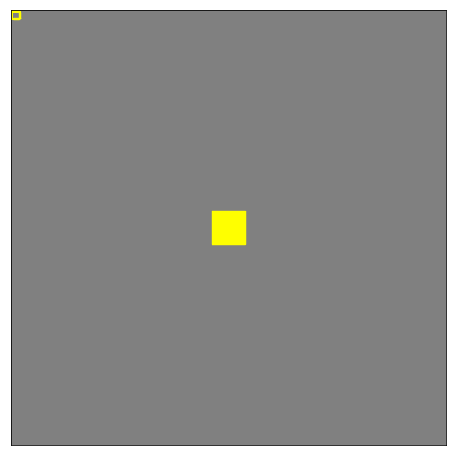

In [7]:
show_image_plt(img)

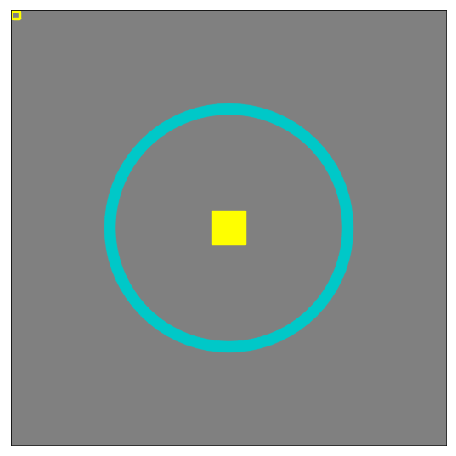

In [8]:
img = cv2.circle(img, (256, 256), 140, color=(200, 200, 0), thickness=11, lineType=cv2.LINE_AA)
show_image_plt(img)

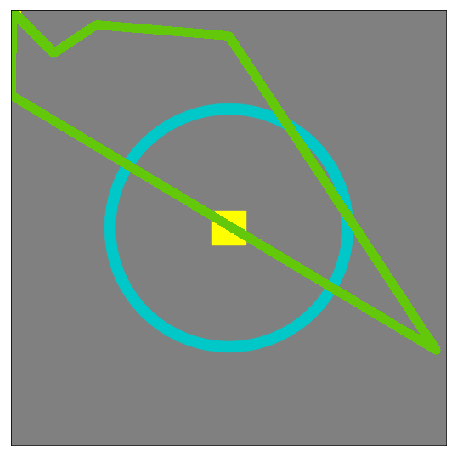

In [9]:
# To draw a polygon, first you need coordinates of vertices. 
# Make those points into an array of shape ROWSx1x2 where 
# ROWS are number of vertices and it should be of type int32.

pts = np.array([1, 1, 50, 50, 100, 17, 256, 30, 500, 400, 0, 100]).reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], isClosed=True, color=(10, 200, 100), thickness=10)
show_image_plt(img)

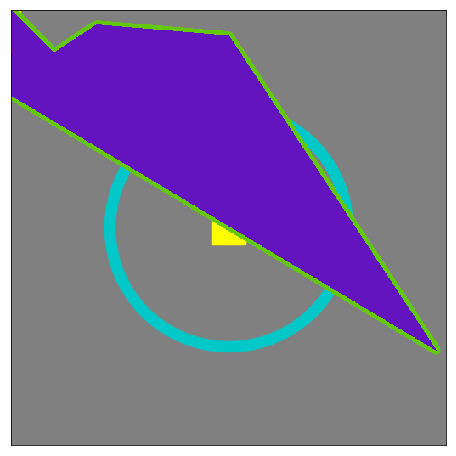

In [10]:
img = cv2.fillPoly(img, [pts], color=(190, 20, 100))
show_image_plt(img)

In [11]:
cv2.imwrite('figures.png', img)

True

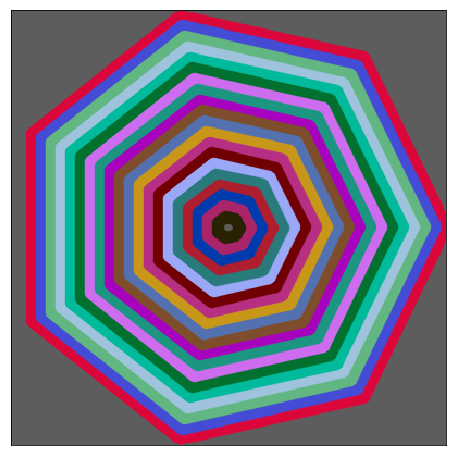

In [12]:
n = 7
canvas = np.random.randint(0, 255) * np.ones(shape=(400, 400, 3), dtype=np.uint8)
for i in range(20, 0, -1):
    poly = []
    for j in range(1, n + 1):
        x_offset = np.cos(2 * np.pi * (j/n))
        y_offset = np.sin(2 * np.pi * (j/n))
        poly.append(np.round(canvas.shape[1] / 2) + 10*i*x_offset)
        poly.append(np.round(canvas.shape[0] / 2) + 10*i*y_offset)
    poly = np.array(poly, dtype=np.int32).reshape(-1, 1, 2)
    canvas = cv2.polylines(canvas, 
                          [poly],
                          isClosed=True,
                          color=tuple(np.random.randint(0, 255) for _ in range(3)),
                          thickness=10,
                          lineType=cv2.LINE_AA)
show_image_plt(canvas)

In [13]:
cv2.imwrite('polygon.png', canvas)

True

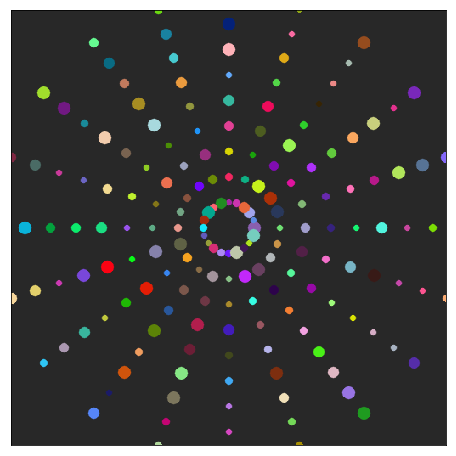

In [14]:
canvas = 40 * np.ones(shape=(512, 512, 3), dtype=np.uint8)
n = 20
for l in range(1, 10):
    start_coords = np.array([[30*l], [0]])
    for i in range(0, n):
        angle = 2*np.pi * (i/n)
        mat = np.array([[np.cos(angle), np.sin(angle)], 
                        [-np.sin(angle), np.cos(angle)]], dtype=np.float32)
        coords = (256 + np.dot(mat, start_coords)).reshape(-1).round().astype(np.int32).tolist()
        canvas = cv2.circle(canvas, 
                            tuple(coords), 
                            np.random.randint(3, 8), 
                            color=tuple((np.random.randint(0, 255) for _ in range(3))), 
                            lineType=cv2.LINE_AA, 
                            thickness=-1)
show_image_plt(canvas)

In [15]:
cv2.imwrite('circles.png', canvas)

True